In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import psutil
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb

In [ ]:
#Load anat, glm, and motcorred functional
#Set spacing
#Align mean green_functional to anat
#Use those params on glm

In [52]:
def get_size(brain):
    return np.multiply(np.shape(brain.numpy()), brain.spacing)

In [2]:
fly = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/'

In [79]:
###################
### Load Brains ###
###################

### Load motcorr green functional
file = os.path.join(fly, 'motcorr/motcorr_red.nii')
func = bbb.load_numpy_brain(file)
mean_func = np.mean(func, axis=-1)
mean_func = np.swapaxes(mean_func,0,1)
mean_func_ants = ants.from_numpy(mean_func)
func_xml_file = os.path.join(fly, 'functional.xml')
mean_func_ants.set_spacing(bbb.get_resolution(func_xml_file))
print('Size: {}'.format(get_size(mean_func_ants)))

### Load anatomy
print('Loading anatomy')
anatomy_file = os.path.join(fly, 'anatomy.nii')
anatomy = bbb.load_numpy_brain(anatomy_file)
anatomy = np.swapaxes(anatomy, 0, 1)
anatomy_ants = ants.from_numpy(anatomy)
anatomy_xml_file = os.path.join(fly, 'anatomy.xml')
anatomy_ants.set_spacing(bbb.get_resolution(anatomy_xml_file))
print('Size: {}'.format(get_size(anatomy_ants)))

### Load glm
print('Loading glm')
file = os.path.join(fly, 'glm/multivariate_analysis_green_my_speedabs.nii')
glm = bbb.load_numpy_brain(file)
glm = np.swapaxes(glm,0,1)
glm_ants = ants.from_numpy(glm)
func_xml_file = os.path.join(fly, 'functional.xml')
glm_ants.set_spacing(bbb.get_resolution(func_xml_file))
print('Size: {}'.format(get_size(glm_ants)))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 20.95 sec
Size: [282.62107687 393.21193304 255.        ]
Loading anatomy

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 335.55 ms
Size: [282.62107687 393.21193304 251.        ]
Loading glm

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 93.61 ms
Size: [282.62107687 393.21193304 255.        ]


In [64]:
np.shape(mean_green_func_ants.numpy())

(92, 128, 51)

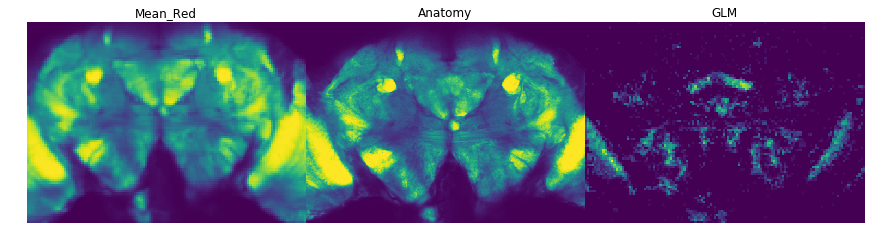

In [81]:
fig = plt.figure(figsize=(15,10))
z = 26

plt.subplot(131)
plt.axis('off')
plt.title('Mean_Red')
plt.imshow(mean_func_ants.numpy()[:,:,z])

plt.subplot(132)
plt.axis('off')
plt.title('Anatomy')
plt.imshow(anatomy_ants.numpy()[:,:,137])

plt.subplot(133)
plt.axis('off')
plt.title('GLM')
plt.imshow(glm_ants.numpy()[:,:,z])


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

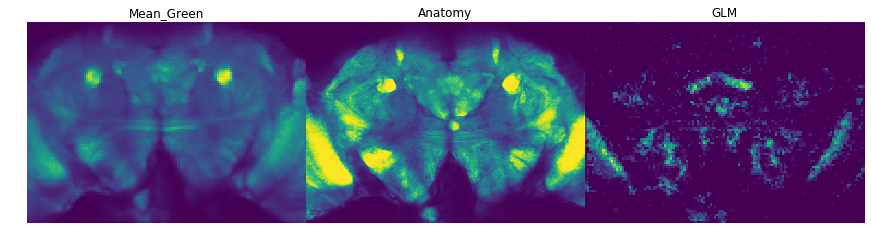

In [75]:
fig = plt.figure(figsize=(15,10))
z = 26

plt.subplot(131)
plt.axis('off')
plt.title('Mean_Green')
plt.imshow(mean_green_func_ants.numpy()[:,:,z])

plt.subplot(132)
plt.axis('off')
plt.title('Anatomy')
plt.imshow(anatomy_ants.numpy()[:,:,137])

plt.subplot(133)
plt.axis('off')
plt.title('GLM')
plt.imshow(glm_ants.numpy()[:,:,z])


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [82]:
### Align Mean_Green to Anatomy
print('Warping functional to anatomy')
func2anat = ants.registration(anatomy_ants, mean_func_ants, type_of_transform='Affine')

### Apply transforms to glm
print('Applying functional --> anatomy transforms to glm')
glm2anat = ants.apply_transforms(anatomy_ants, glm_ants, func2anat['fwdtransforms'])
save_file = os.path.join(fly, 'alignment/glm2anat_round2.nii')
bbb.save_brain(save_file, glm2anat.numpy())

Warping functional to anatomy
Applying functional --> anatomy transforms to glm

~~ save_brain ~~
Current memory usage: 41.99GB
save_brain done. Duration: 682.41 ms


In [77]:
func2anat

{'fwdtransforms': ['/tmp/tmpksn3umw90GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpksn3umw90GenericAffine.mat'],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (92, 128, 51)
 	 Spacing    : (3.072, 3.072, 5.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'warpedmovout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (368, 512, 251)
 	 Spacing    : (0.768, 0.768, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]}

In [78]:
save_file = os.path.join(fly, 'alignment/func2anat.nii')
bbb.save_brain(save_file, func2anat['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 21.95GB
save_brain done. Duration: 537.82 ms


In [9]:
save_file = os.path.join(fly, 'alignment/glm2anat.nii')
bbb.save_brain(save_file, glm2anat.numpy())


~~ save_brain ~~
Current memory usage: 1.85GB
save_brain done. Duration: 620.09 ms


In [10]:
save_file = os.path.join(fly, 'alignment/green_mean.nii')
bbb.save_brain(save_file, mean_green_func_ants.numpy())


~~ save_brain ~~
Current memory usage: 1.66GB
save_brain done. Duration: 8.10 ms


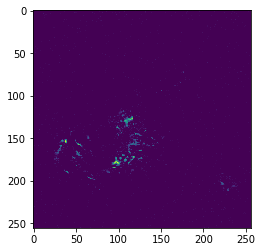

In [13]:
plt.imshow(glm_ants.numpy()[:,:,10])
plt.show()

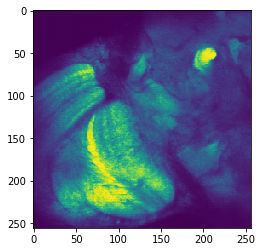

In [15]:
plt.imshow(anatomy_ants.numpy()[:,:,50])
plt.show()

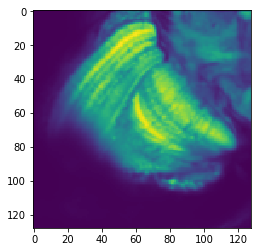

In [20]:
plt.imshow(mean_red_func_ants.numpy()[:,:,20])
plt.show()

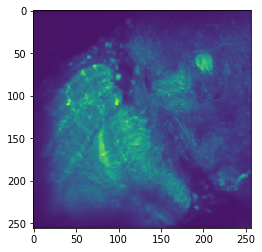

In [18]:
plt.imshow(mean_green_func_ants.numpy()[:,:,10])
plt.show()

In [ ]:
### Load glm map
print('Loading glm map')
try:
    file = os.path.join(fly, 'glm', 'multivariate_analysis_green_speed.nii')
    glm = load_numpy_brain(file)
except:
    file = os.path.join(fly, 'glm', 'multivariate_analysis_green.nii')
    glm = load_numpy_brain(file)
glm = np.swapaxes(glm,0,1)
glm_ants = ants.from_numpy(glm)
func_xml_file = os.path.join(fly, 'functional.xml')
glm_ants.set_spacing(get_resolution(func_xml_file))

### Downsample anatomy, downsample mean_func, downsample meanbrain
anatomy_ants = ants.resample_image(anatomy_ants, glm_ants.spacing)
mean_func_ants = ants.resample_image(mean_func_ants, glm_ants.spacing)
meanbrain_downsampled = ants.resample_image(meanbrain_ants, glm_ants.spacing)


### Align functional to anatomy
print('Warping functional to anatomy')
func2anat = ants.registration(anatomy_ants, mean_func_ants, type_of_transform='SyN')

### Apply transforms to glm
print('Applying functional --> anatomy transforms to glm')
glm2anat = ants.apply_transforms(anatomy_ants, glm_ants, func2anat['fwdtransforms'])
save_file = os.path.join(warp_directory, 'glm2anat_down.nii')
save_brain(save_file, glm2anat.numpy())


### Warp anatomy to meanbrain
print('Warping anatomy to meanbrain')
anat2mean = ants.registration(meanbrain_downsampled, anatomy_ants, type_of_transform='SyN')
save_file = os.path.join(warp_directory, 'anat2mean_down.nii')
save_brain(save_file, anat2mean['warpedmovout'].numpy())

### Apply transforms to glm
print('Applying anatomy --> meanbrain transforms to glm')
glm2mean = ants.apply_transforms(meanbrain_downsampled,glm2anat,anat2mean['fwdtransforms'])
save_file = os.path.join(warp_directory, 'glm2mean_down.nii')
save_brain(save_file, glm2mean.numpy())
print('Duration: {:.2f} min'.format((time()-t0)/60))